# Hough circle transform to detect extra pellet

In [1]:
# import os
from glob import glob

from imageio import imread, imwrite
import numpy as np
import matplotlib.pyplot as plt
import random, os

# import logging
# logging.basicConfig(level=logging.INFO)

import astimp

import cv2

In [9]:
class Dataset():
  def __init__(self, image_folder):
    assert os.path.exists(image_folder)
    self.image_folder = image_folder
    self.paths = glob(image_folder + '/*.jpg')
    
try:
  amman = Dataset('/Users/marco/Downloads/Amman routine AST pictures/')
except:
  print("error with the amman picture database folder")

try:
  creteil = Dataset('imgs/creteil')
except AssertionError:
  print("error with the creteil picture database folder")

try:
  improc_test = Dataset("../../improc/tests/images")
except AssertionError:
  print("error with the improc test folder")

this_ds = improc_test

## LOAD RANDOM IMAGE FROM IMPROC TEST IMAGES
# path = random.choice(this_ds.paths)

path = os.path.join(improc_test.image_folder, "test0.jpg")
# path = os.path.join(amman.image_folder, "20180719-SAU-205.JPG")
# path = os.path.join(amman.image_folder, "20181024-SAU-20.jpg")
print(path)
img = np.array(imread(path))  # load image

astimp.config.Inhibition_diameterReadingSensibility = 0.5;
print(astimp.config.Inhibition_diameterReadingSensibility)

# image processing
crop = astimp.cropPetriDish(img)  # crop Petri Dish
circles = astimp.find_atb_pellets(crop)  # find pellets
# px_per_mm = 1/astimp.get_mm_per_px(circles)



error with the creteil picture database folder
../../improc/tests/images/test0.jpg
0.5


In [11]:
# https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab
%matplotlib widget

plt.figure(figsize=(7,7))
plt.imshow(crop)
x = 1050
y = 950
plt.plot(x,y,'or')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

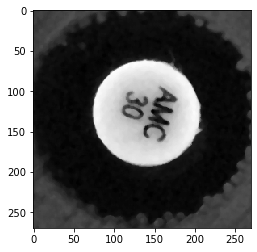

In [12]:
%matplotlib inline
mm_per_px = astimp.get_mm_per_px(circles)
pd = int(astimp.config.Pellets_DiamInMillimeters / mm_per_px)
sel = crop[y-pd:y+pd,x-pd:x+pd]
sel = cv2.cvtColor(sel, cv2.COLOR_BGR2GRAY)
sel = cv2.medianBlur(sel,5)
plt.imshow(sel, cmap='gray')

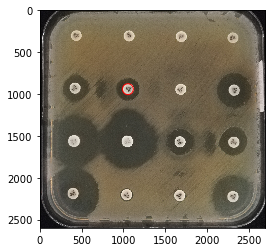

In [13]:
th_v, img = cv2.threshold(sel,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)

pellets = cv2.HoughCircles(sel,
                 cv2.HOUGH_GRADIENT, 1,
                 pd*2,
                 param1=th_v,
                 param2=1,
                 minRadius=int(pd/2*0.8),
                 maxRadius=int(pd/2*1.2))

ax = plt.gca()
plt.imshow(crop, cmap='gray')
if pellets is not None:
  pellet = pellets[0][0]
  pellet[0] += x-pd
  pellet[1] += y-pd
  cx,cy,r = pellet
  c = plt.Circle((cx,cy),r, ec='r', fc=None, fill=False)
  ax.add_artist(c)
  

In [14]:
pellet

array([1053.5,  941.5,   64.9], dtype=float32)

## the same with astimp

(1055.5, 942.5) 66.4000015258789


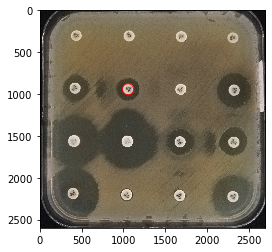

In [15]:
c = astimp.searchOnePellet(crop,x,y,mm_per_px)
print(c.center, c.radius)
ax = plt.gca()
plt.imshow(crop, cmap='gray')
cx,cy = c.center
r = c.radius
c = plt.Circle((cx,cy),r, ec='r', fc=None, fill=False)
ax.add_artist(c)